# Logistische Regression

In [2]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import cv2
from PIL import Image
from numpy import load

## Datensatz laden

In [3]:
# Laden des Trainings- und Testdatensatzes

X_train=load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32) * 1.0/255.0 # normalisieren
y_train=load('../01_Dataset/dataset_28x28/y_train.npy')
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) * 1.0/255.0  # normalisieren
y_test=load('../01_Dataset/dataset_28x28/y_test.npy')

# Form und Anzahl der Datensätze
print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(6421, 28, 28, 1)
6421
(2753, 28, 28, 1)
2753


## Datensatz Stichprobe

Ein Blick in den Datensatz:

Kategorie:1


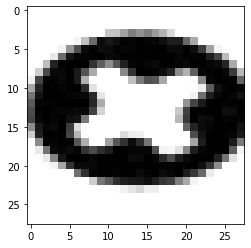

In [6]:
from random import randrange


# Kategorien:

# 0 = innensechskant
# 1 = philips
# 2 = pozidriv
# 3 = sechskant
# 4 = torx

# zufällig ein Beispiel aus dem Datensatz anzeigen
i=randrange(len(y_train))
plt.imshow(X_train[i].reshape(28,28),cmap='gray')
plt.show
print("Kategorie:"+ str(y_train[i]))

## Formatieren

**Erklärung: weshalb formatieren?**

In [1]:
# converting X, 28x28=784, die Pixel werden in einem Vektor umgeformt
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# converting list to array
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

NameError: name 'X_train' is not defined

In [102]:
y_train

array([1, 4, 1, ..., 1, 4, 0])

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

## One-Hot-Encoding

Das logistische Regressions Modell kann erstmal nur darauf trainiert werden, ein Objekt von anderen zu unterscheiden. Dafür müssen die Labels (y_train & y_test) umgewandelt werden. Bisher sind Werte von 0 bis 4 enthalten die für die jeweilige Kategorie stehen. Da die logistische Regression nur mit Werten zwischen 0 und 1 arbeiten kann, müssen die Labels dem so genannten "One-Hot-Encoding" unterzogen werden.  


In [9]:
# auf eine Klasse trainieren, One-Hot-Encoding
print("One-Hot_Encoded:")
# 0 = innensechskant
y_train_0=y_train == 0 # False,True,...
y_test_0 =y_test == 0
print(y_train_0)
      
# 1 = philips
y_train_1=y_train == 1 
y_test_1 =y_test == 1
print(y_train_1)
      
# 2 = pozidriv
y_train_2=y_train == 2 
y_test_2 =y_test == 2
print(y_train_2)
      
# 3 = sechskant
y_train_3=y_train == 3 
y_test_3 =y_test == 3
print(y_train_3)
      
# 4 = torx
y_train_4=y_train == 4
y_test_4 =y_test == 4
print(y_train_4)


# False,True,... in Werte zw. 0...1 umwandeln
y_train_0 = y_train_0.astype(np.float32) 
y_test_0 = y_test_0.astype(np.float32) 
y_train_1 = y_train_1.astype(np.float32) 
y_test_1 = y_test_1.astype(np.float32) 
y_train_2 = y_train_2.astype(np.float32) 
y_test_2 = y_test_2.astype(np.float32)
y_train_3 = y_train_3.astype(np.float32) 
y_test_3= y_test_3.astype(np.float32) 
y_train_4 = y_train_4.astype(np.float32) 
y_test_4 = y_test_4.astype(np.float32) 
print("Umwandlung in Float-Werte:")
print(y_train_0)
print(y_train_1)
print(y_train_2)
print(y_train_3)
print(y_train_4)

One-Hot_Encoded:
[False False  True ... False False False]
[False  True False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ...  True  True  True]
Umwandlung in Float-Werte:
[0. 0. 1. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 1. 1. 1.]


## Modell trainieren

```python
from scipy.special import expit


def S(x):
    return expit(x)
    # return 1 / (1 + np.exp(-x))

# Funktion genau erklären:
def f(w, b, x):
    return S(w @ x.T + b)


def J(w, b, x, y):
    return -np.mean(y * np.log(f(w, b, x)) + \
                    (1 - y) * np.log(1 - f(w, b, x)))


def J_ableitung_w(w, b, x, y):
    e = f(w, b, x) - y
    return np.mean(x.T * e, axis=1)


def J_ableitung_b(w, b, x, y):
    return np.mean(f(w, b, x) - y)

# print(X_train.shape)
# exit()
lr = 0.01
w = np.zeros((1, 784)) # bei der NUll ist Steigung am größten->numerisch besser
b = 1
for i in range(0, 500):

    dw = J_ableitung_w(w, b, X_train, y_train_3)
    db = J_ableitung_b(w, b, X_train, y_train_3)

    w = w - lr * dw
    b = b - lr * db

    cost = J(w, b, X_train, y_train_3)
    print("Kosten: " + str(cost))
```

```python
y_test_pred = f(w, b, X_test) > 0.5
y_test_pred = y_test_pred.reshape(-1)
y_test_pred=y_test_pred.astype(np.float32)
print(y_test_pred.shape)
print(np.mean(y_test_3 == y_test_pred))
```

## Modell Trainieren mit Torx

```python
lr = 0.01
w = np.zeros((1, 784)) # bei der NUll ist Steigung am größten->numerisch besser
b = 1
for i in range(0, 500):

    dw = J_ableitung_w(w, b, X_train, y_train_4)
    db = J_ableitung_b(w, b, X_train, y_train_4)

    w = w - lr * dw
    b = b - lr * db

    cost = J(w, b, X_train, y_train_4)
    print("Kosten: " + str(cost))
```

## Modell Genauigkeit

```python
y_test_pred = f(w, b, X_test)# > 0.4  # 0.5 entspricht 50% Wahrscheinlichkeit, kann auch höher gesetzt werden, je nachdem wie sicher das Ergebnis sein soll
print(y_test_pred)
print(y_test_4)

y_test_pred = f(w, b, X_test) > 0.5
print(y_test_pred)
print(y_test_4)

y_test_pred = y_test_pred.reshape(-1)
print(y_test_pred)

y_test_pred=y_test_pred.astype(np.float32)
print(y_test_pred)
print(y_test_pred.shape)

print(np.mean(y_test_4 == y_test_pred))
```

## Auswertung

```{toggle} 
**Hier die falsch erkannten Bilder groß Darstellen**
```

```python
nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24))

im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_4_false[im,:,:,0].astype('uint8'),cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()
```

```python
X_false = []
y = []

for features,label in image_dataset:
    X_false.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Falsch vorhergesagte Bilder anzeigen
imgs=0

for i in range(0, len(X_test)):
    # Welche Bilder wurden falsch als Torx erkannt?
    if y_test_pred[i] == 1 and y_test_4[i] == 0:
        X_4_false=np.asarray(X_test[i].reshape(-1,28,28,1))
        plt.imshow(X_test[i].reshape(28,28),cmap='gray')
        plt.show()
        print(i)
        imgs=imgs + 1
        print(imgs)

print(imgs)
```

**Die Log.Reg. kann lernen Bilder zu erkennen, ist aber nicht sehr leistungsfähig. Im nächsten Abschnitt werden die ersten Schritte hin zu neuronalen Netzen gemacht**